In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

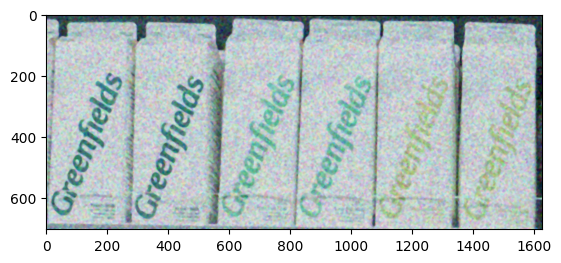

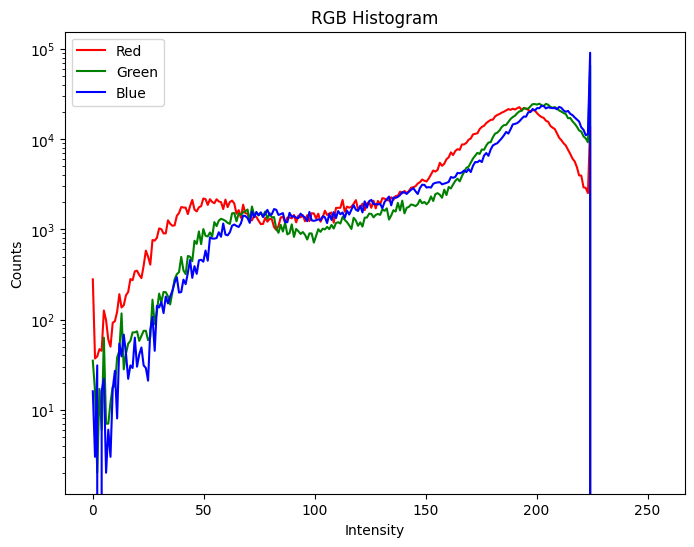

In [23]:

# Load the image using cv2.imread
image_noised = cv2.imread("/Users/pelle/Desktop/scene12.png")[:,:,::-1]  # OpenCV loads BGR, so we reverse the order to RGB
image_noised = cv2.medianBlur(image_noised, 3)

image_noised = cv2.medianBlur(image_noised, 5)
image_noised = cv2.medianBlur(image_noised, 7)

plt.imshow(image_noised); plt.show()

# Extract 2-D arrays of the RGB channels: red, green, blue
red, green, blue = image_noised[:,:,0], image_noised[:,:,1], image_noised[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
green_pixels = green.flatten()
blue_pixels = blue.flatten()

# Calculate histograms for each channel
red_hist = np.histogram(red_pixels, bins=256, range=(0, 255))
green_hist = np.histogram(green_pixels, bins=256, range=(0, 255))
blue_hist = np.histogram(blue_pixels, bins=256, range=(0, 255))

# Plot histograms
plt.figure(figsize=(8, 6))
plt.plot(red_hist[1][:-1], red_hist[0], color='r')
plt.plot(green_hist[1][:-1], green_hist[0], color='g')
plt.plot(blue_hist[1][:-1], blue_hist[0], color='b')
# plt.xticks(ticks=np.linspace(0, 255, 17), labels=range(0, 256, 16))
plt.yscale('log')
plt.xlabel('Intensity')
plt.ylabel('Counts')
# plt.xlim(1,220)
# plt.ylim(1,10000)

plt.title('RGB Histogram')
plt.legend(['Red', 'Green', 'Blue'])
plt.show()


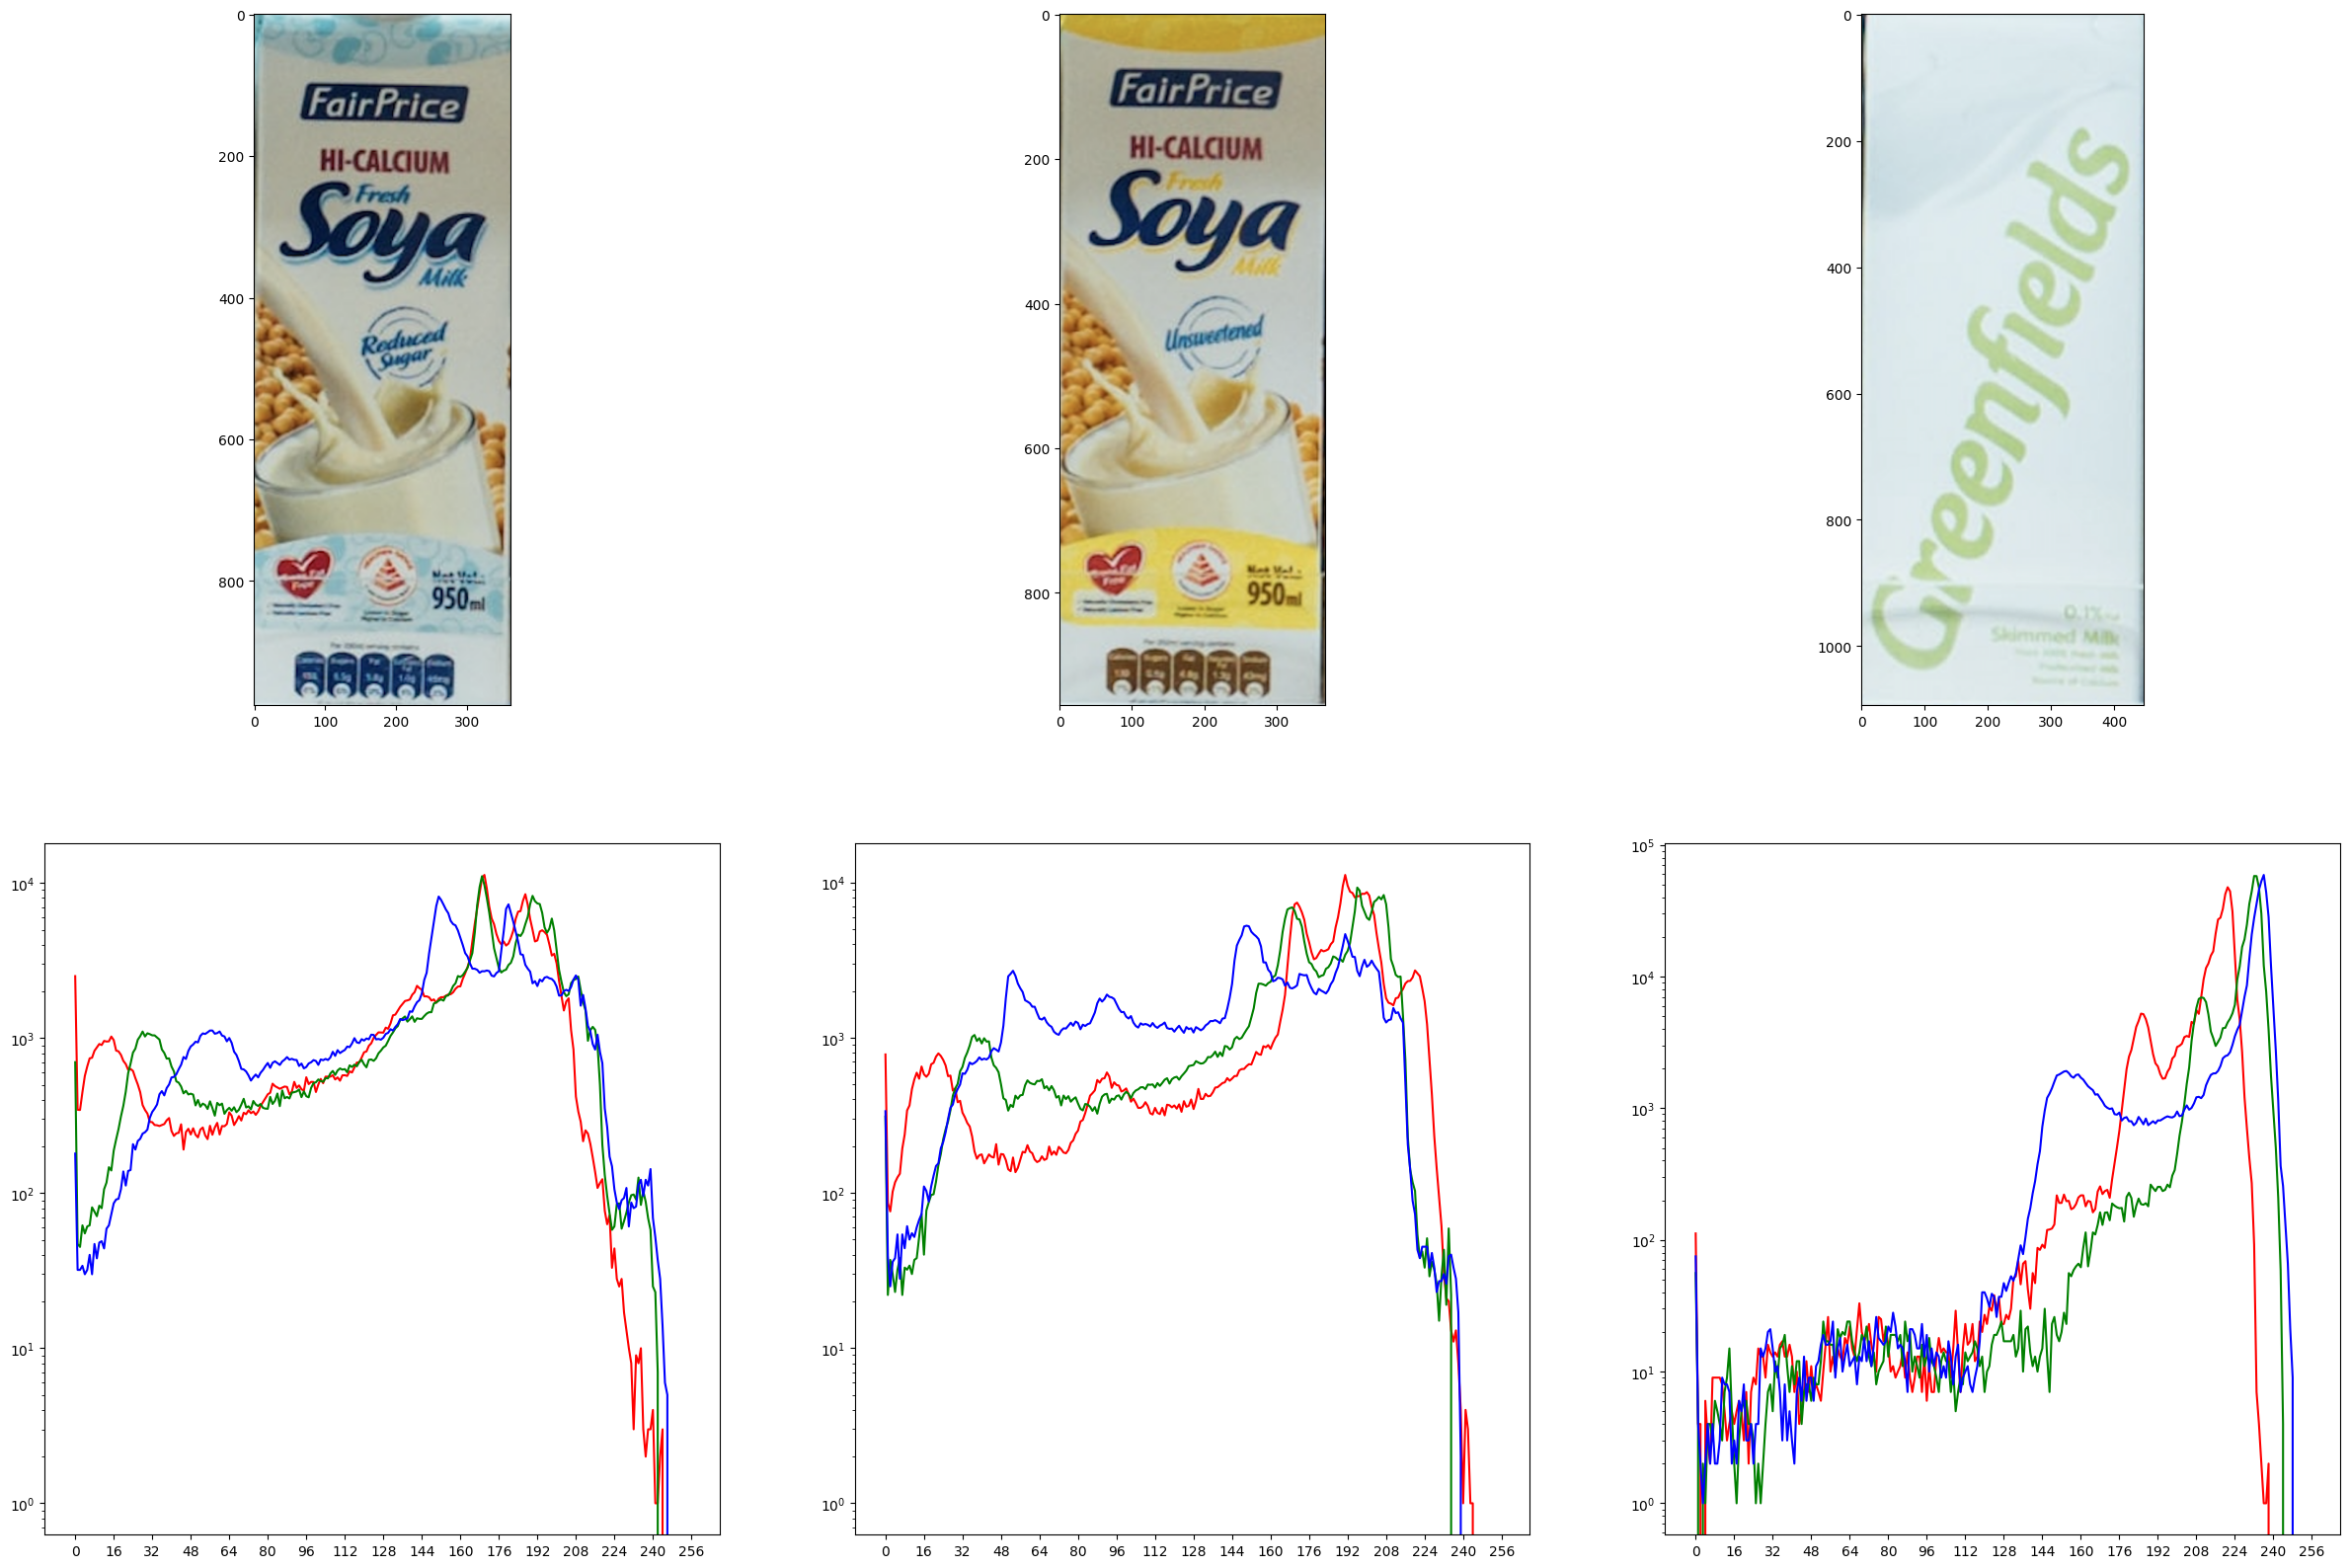

In [5]:
plt.figure(figsize=(30,20))
for i, num in enumerate([23, 24, 18]) :
    
    image = cv2.imread(f"/Users/pelle/Desktop/ref{num}.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converti da BGR a RGB

    # Show the image
    plt.subplot(2, 3, i+1)
    plt.imshow(image)

    # Extract 2-D arrays of the RGB channels: red, green, blue
    red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

    # Flatten the 2-D arrays of the RGB channels into 1-D
    red_pixels = red.flatten() / 255.0  # Normalizza i valori nel range [0, 1]
    green_pixels = green.flatten() / 255.0
    blue_pixels = blue.flatten() / 255.0

    # Calcola l'istogramma dei pixel per ogni canale
    red_px = np.histogram(red_pixels, bins=256, range=[0, 1])
    green_px = np.histogram(green_pixels, bins=256, range=[0, 1])
    blue_px = np.histogram(blue_pixels, bins=256, range=[0, 1])

    # Plot degli istogrammi
    plt.subplot(2,3,i+4)
    plt.plot(red_px[1][:256], red_px[0], color='r')
    plt.plot(green_px[1][:256], green_px[0], color='g')
    plt.plot(blue_px[1][:256], blue_px[0], color='b')
    plt.xticks(ticks=np.linspace(0, 1, 17), labels=range(0, 257, 16))
    plt.yscale('log')

plt.show()


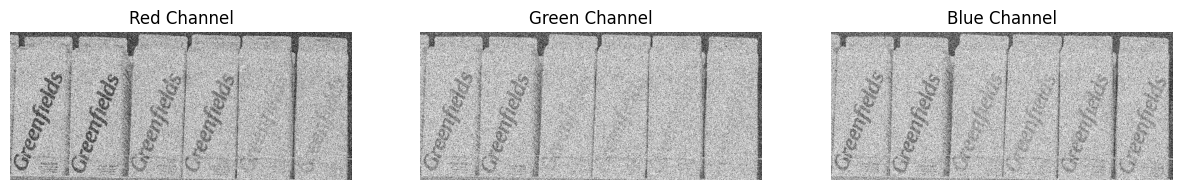

In [50]:
def plot_rgb_channels(image):
    # Split the image into its RGB channels
    r, g, b = cv2.split(image)

    # Plotting each channel separately
    plt.figure(figsize=(15, 10))

    # Red channel
    plt.subplot(1, 3, 1)
    plt.imshow(r, cmap='gray')
    plt.title('Red Channel')
    plt.axis('off')

    # Green channel
    plt.subplot(1, 3, 2)
    plt.imshow(g, cmap='gray')
    plt.title('Green Channel')
    plt.axis('off')

    # Blue channel
    plt.subplot(1, 3, 3)
    plt.imshow(b, cmap='gray')
    plt.title('Blue Channel')
    plt.axis('off')

    plt.show()
    
plot_rgb_channels(cv2.imread("/Users/pelle/Desktop/scene12.png")[:,:,::-1])

In [62]:
np.max(image_noised)
np.min(image_noised)
np.mean(image_noised)

154.0898136112043